In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 0.3)
print y_train
print '----------------'
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print knn.predict(X_test)
print y_test

[1 2 0 2 0 2 1 1 1 0 1 1 2 1 1 1 1 0 0 0 0 0 1 2 0 0 2 2 2 2 0 2 0 1 1 1 0
 1 0 1 2 2 0 2 0 2 2 0 2 2 2 0 2 2 2 2 2 1 2 0 0 1 1 1 1 2 0 2 0 2 1 1 1 2
 0 2 2 0 1 2 0 2 1 1 0 2 0 0 0 0 1 0 0 1 0 2 1 1 2 2 1 1 2 1 0]
----------------
[2 0 1 2 0 0 0 0 2 1 0 1 0 1 0 2 2 2 1 2 1 0 2 1 1 2 0 1 2 2 1 1 0 0 0 1 1
 1 2 1 0 0 0 2 2]
[1 0 1 2 0 0 0 0 2 1 0 1 0 1 0 2 2 2 1 2 1 0 2 1 1 2 0 1 2 2 1 1 0 0 0 1 1
 1 2 1 0 0 0 2 2]


[ 30.00821269  25.0298606   30.5702317   28.60814055]
[ 24.   21.6  34.7  33.4]


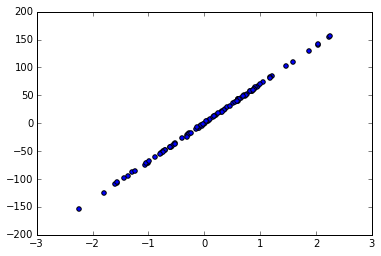

In [28]:
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

print model.predict(data_X[:4, :]) #预测值
print data_y[:4] #真实值

import matplotlib.pyplot as plt

X,y = datasets.make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 1)
plt.scatter(X, y)
plt.show()

In [3]:
print model.coef_ # y = 0.1x + 0.3 获取系数
print model.intercept_

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


In [5]:
print model.get_params()
print model.score(data_X, data_y) # R^2 coefficient of datermination

{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}
0.740607742865


# normalication

In [6]:
from sklearn import preprocessing
import numpy as np

a = np.array([[10, 2.7, 3.6],
              [-100, 5, -2],
              [120, 20, 40]], dtype = np.float64)
print a
print preprocessing.scale(a)

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


In [19]:
from sklearn import preprocessing # 数据集归一化
import numpy as np
from sklearn.cross_validation import train_test_split # train,testing 数据集划分
from sklearn.datasets.samples_generator import make_classification # 数据生成模块
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_classification(n_samples = 300 # 300 个data
                           , n_features=2 # 2个属性
                           , n_redundant=0, n_informative=2, #2个相关的属性
                           random_state=22, # 每次产生的数据是一样的
                           n_clusters_per_class=1, scale = 100)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

#X = preprocessing.minmax_scale(X, feature_range=(0, 1))
X = preprocessing.scale(X) # if not scale, the result would be 0.544444444444
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
clf = SVC()
clf.fit(X_train, y_train) # 学习
print clf.score(X_test, y_test) # 测试


0.933333333333


# cross validation

In [21]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print knn.score(X_test, y_test)

from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv = 5, scoring='accuracy')
print scores
print scores.mean()

0.973684210526
[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333


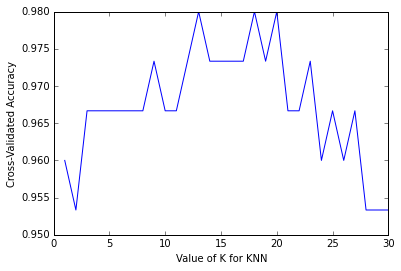

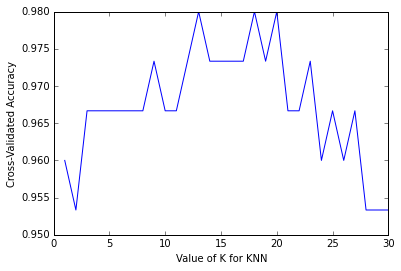

In [27]:
%matplotlib inline
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
k_scores1 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error')
    k_scores.append(1-loss.mean())
    k_scores1.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

plt.plot(k_range, k_scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# cross validation - over fitting

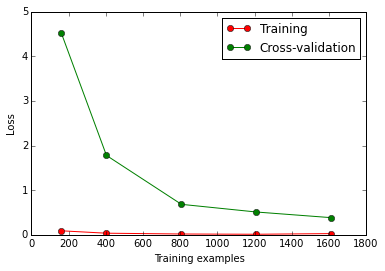

In [32]:
%matplotlib inline
from sklearn.learning_curve import learning_curve # 可视化整个学习过程
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='mean_squared_error', 
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(train_sizes, test_loss_mean, 'o-', color='g', label='Cross-validation')

plt.xlabel("Training examples")
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

# cross validation - training & Cross-validation

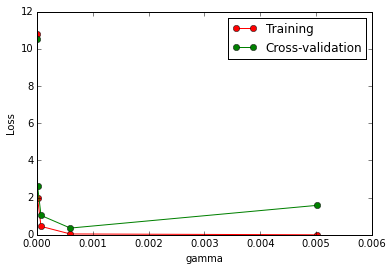

In [34]:
%matplotlib inline
from sklearn.learning_curve import validation_curve # 可视化整个学习过程
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

param_range = np.logspace(-6, -2.3, 5)

train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(param_range, test_loss_mean, 'o-', color='g', label='Cross-validation')

plt.xlabel("gamma")
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

# save

In [41]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## method 1: pickle

In [51]:
import pickle
with open('./saved/clf.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [52]:
with open('saved/clf.pickle', 'rb') as f:
    clf2 = pickle.load(f)
    print clf2.predict(X[0:1])

[0]


## method 2: joblib

In [53]:
from sklearn.externals import joblib
joblib.dump(clf, 'saved/clf.pkl')

['saved/clf.pkl',
 'saved/clf.pkl_01.npy',
 'saved/clf.pkl_02.npy',
 'saved/clf.pkl_03.npy',
 'saved/clf.pkl_04.npy',
 'saved/clf.pkl_05.npy',
 'saved/clf.pkl_06.npy',
 'saved/clf.pkl_07.npy',
 'saved/clf.pkl_08.npy',
 'saved/clf.pkl_09.npy',
 'saved/clf.pkl_10.npy',
 'saved/clf.pkl_11.npy']

In [54]:
clf3 = joblib.load('saved/clf.pkl')
print clf3.predict(X[0:1])

[0]
